In [46]:
# import the libraries we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# read data
df = pd.read_csv('MiBolsillo.csv',encoding = 'unicode_escape',sep=';')

In [48]:
# we take a look at the data
df.head(5)

,id,safra_abertura,cidade,estado,idade,sexo,limite_total,limite_disp,data,valor,grupo_estabelecimento,cidade_estabelecimento,pais_estabelecimento
0,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5605,4.12.2019,31,SERVIO,SAO PAULO,BR
1,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5343,9.11.2019,"150,01",FARMACIAS,SANTOS,BR
2,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2829,6.05.2019,50,SERVIO,SAO PAULO,BR
3,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2547,1.06.2019,"54,4",M.O.T.O.,OSASCO,BR
4,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2515,1.06.2019,"32,79",M.O.T.O.,OSASCO,BR


In [49]:
# translate variable names into English

df.columns = ['id','branch_number','city','state','age','gender','total_credit_card_limit','current_available_limit' ,'date','amount','category_expense','purchase_city','purchase_country']

In [50]:
df.date = pd.to_datetime(df.date,dayfirst=True)
df.head()

,id,branch_number,city,state,age,gender,total_credit_card_limit,current_available_limit,date,amount,category_expense,purchase_city,purchase_country
0,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5605,2019-12-04,31,SERVIO,SAO PAULO,BR
1,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,5343,2019-11-09,"150,01",FARMACIAS,SANTOS,BR
2,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2829,2019-05-06,50,SERVIO,SAO PAULO,BR
3,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2547,2019-06-01,"54,4",M.O.T.O.,OSASCO,BR
4,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,F,4700,2515,2019-06-01,"32,79",M.O.T.O.,OSASCO,BR


In [51]:
# I create a dataframe as customers with old and new customer names

customers = pd.DataFrame(df.id.unique())
customers.columns = ['old_customer_name']
new_list = list(range(1, len(customers)+1))
customers['new_customer_name'] = new_list
customers

,old_customer_name,new_customer_name
0,"4,53E+11",1
1,"4,23E+11",2
2,"5,91E+11",3
3,"8,61E+11",4
4,"6,51E+11",5
5,94873707154,6
6,"3,09E+11",7
7,"2,46E+11",8
8,"5,43E+11",9
9,"5,81E+11",10


In [7]:
# I am changing id to understand customers more easily

df["id"].replace(customers['old_customer_name'].values,customers['new_customer_name'].values, inplace=True)

In [8]:
# we have information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4955 non-null   int64         
 1   branch_number            4955 non-null   int64         
 2   city                     4955 non-null   object        
 3   state                    4955 non-null   object        
 4   age                      4955 non-null   int64         
 5   gender                   4955 non-null   object        
 6   total_credit_card_limit  4955 non-null   int64         
 7   current_available_limit  4955 non-null   int64         
 8   date                     4955 non-null   datetime64[ns]
 9   amount                   4955 non-null   object        
 10  category_expense         4955 non-null   object        
 11  purchase_city            4936 non-null   object        
 12  purchase_country         4937 non-

In [52]:
# we need to float the type of amount variable
for i in range(0,len(df.amount)):
    df.amount[i] = df.amount[i].replace('.','').replace(',','.')

#I export values containing '-' in the amount variable as df_amount_nan
df_amount_nan = df[df.amount == ' -   ']

# There are '-' values in the amount column. I am deleting theese rows because we can't convert it to the float type with these values
df = df[df.amount != ' -   ']

# Now the amount variable is ready to convert to float type.
df.amount = df.amount.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [53]:
# I am converting the date variable to date_time format
df.date = pd.to_datetime(df.date,dayfirst=True)

In [54]:
# We convert the gender variable to dummy_variable
dms = pd.get_dummies(df['gender'])
df = pd.concat([df,dms],axis=1)
df.drop(['gender', 'M'], axis=1,inplace=True)
df.rename(columns={'F': 'Female'}, inplace=True)
df

,id,branch_number,city,state,age,total_credit_card_limit,current_available_limit,date,amount,category_expense,purchase_city,purchase_country,Female
0,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,5605,2019-12-04,31.00,SERVIO,SAO PAULO,BR,1
1,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,5343,2019-11-09,150.01,FARMACIAS,SANTOS,BR,1
2,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,2829,2019-05-06,50.00,SERVIO,SAO PAULO,BR,1
3,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,2547,2019-06-01,54.40,M.O.T.O.,OSASCO,BR,1
4,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,2515,2019-06-01,32.79,M.O.T.O.,OSASCO,BR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,"9,19E+11",201910,SAO PAULO,SP,37,8500,5305,2020-01-23,25.50,RESTAURANTE,SAO PAULO,BR,0
4951,"9,19E+11",201910,SAO PAULO,SP,37,8500,5266,2020-01-23,39.50,SUPERMERCADOS,SAO PAULO,BR,0
4952,"9,19E+11",201910,SAO PAULO,SP,37,8500,5445,2020-02-19,75.56,RESTAURANTE,SAO PAULO,BR,0
4953,"9,19E+11",201910,SAO PAULO,SP,37,8500,5002,2020-03-30,5.90,SERVIO,SAO PAULO,BR,0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


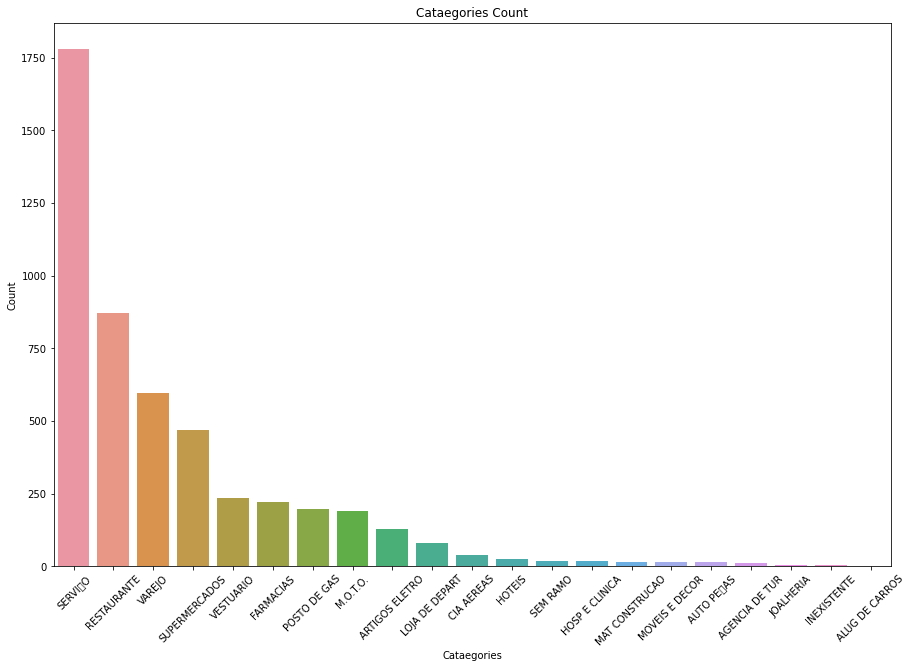

In [55]:
# I want to look at the total expense in each category
# higher total  expense in services, restaurants, varejo and supermarket (essential services)

categ = df.category_expense.value_counts().sort_values(ascending=False)


plt.figure(figsize=(15,10))
sns.barplot(x=categ.index,y=categ.values)
plt.xlabel('Cataegories')
plt.ylabel('Count')
plt.title("Cataegories Count")
plt.xticks(rotation= 45);

In [56]:

# I look at the number of transactions each client has with a credit card by age 
#higer number of transactions  in the ages v34, 28, 277,32

freq = df.groupby('age')[['amount']].count().sort_values('amount',ascending=False)
freq.rename(columns={'amount': 'Frequency'}, inplace=True)
freq

,Frequency
age,
34,694
28,641
27,510
32,393
37,312
31,289
43,270
45,268
30,246


In [69]:
# I look at the total spending of each customer
total = df.groupby('id')[['amount']].sum().sort_values('amount',ascending=False)
total.rename(columns={'amount': 'Total_spending'}, inplace=True)
total

,Total_spending
id,
"6,06E+11",151744.49
"1,00E+12",46792.97
"3,31E+11",39500.85
"2,21E+11",37023.41
"5,02E+11",31114.48
"8,61E+11",25350.47
"5,38E+11",21523.28
"9,54E+11",19785.22
"8,14E+11",18700.03


In [61]:
# I look at the total spending of each customer
total = df.groupby('id')[['amount']].sum().sort_values('amount',ascending=False)
total.rename(columns={'amount': 'Total_spending'}, inplace=True)
total

,Total_spending
id,
"6,06E+11",151744.49
"1,00E+12",46792.97
"3,31E+11",39500.85
"2,21E+11",37023.41
"5,02E+11",31114.48
"8,61E+11",25350.47
"5,38E+11",21523.28
"9,54E+11",19785.22
"8,14E+11",18700.03


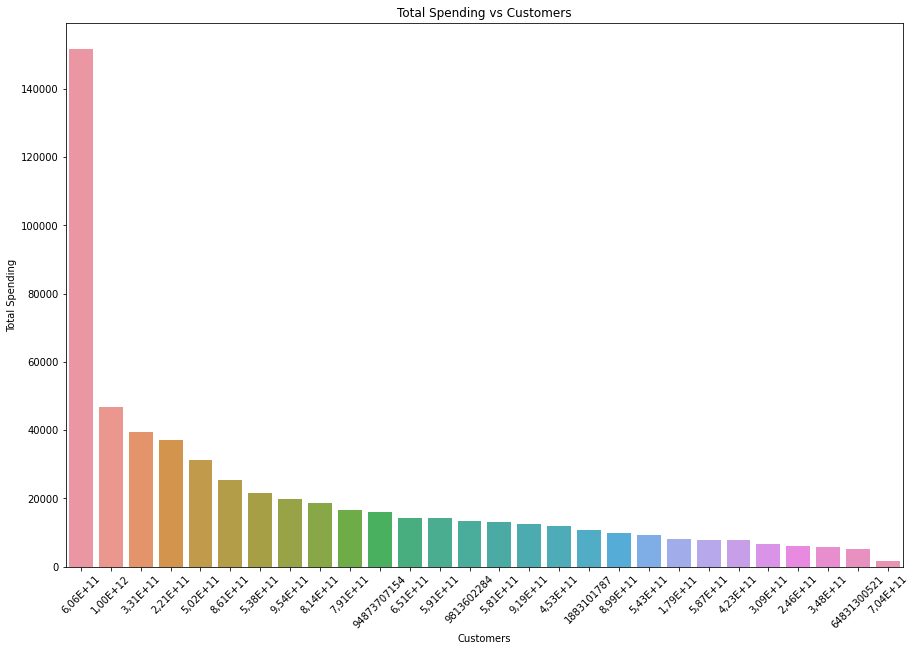

In [62]:
# I want to look at the total spending of each customers

plt.figure(figsize=(15,10))
sns.barplot(x=total.index,y=total['Total_spending'])
plt.xlabel('Customers')
plt.ylabel('Total Spending')
plt.title("Total Spending vs Customers")
plt.xticks(rotation= 45);


As it is seen, the 6,06E+11 customer is the person who spends the most among the customers.

In [60]:
# I create data sets covid and pre covid

# pre covid
pre_covid = df[(df.date > '2020-01-01') & (df.date < '2020-03-18')]

#covid
covid = df[(df.date >= '2020-03-18')]

In [63]:
covid.head()

,id,branch_number,city,state,age,total_credit_card_limit,current_available_limit,date,amount,category_expense,purchase_city,purchase_country,Female
5,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,2636,2020-05-05,44.90,ARTIGOS ELETRO,OSASCO,BR,1
7,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,2789,2020-03-21,5.00,M.O.T.O.,SAO PAULO,BR,1
11,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,1706,2020-04-04,360.45,M.O.T.O.,LNKD.IN/BILL,IE,1
15,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,2117,2020-04-01,26.00,SERVIO,CURITIBA,BR,1
29,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,2770,2020-04-20,40.00,SERVIO,SAO PAULO,BR,1


In [64]:
# Frequency of use

covid_freq = covid.groupby('id')[['age']].count().sort_values('age',ascending=False)
covid_freq.columns = ['frequency']
print('average number of transactions frequency: ',covid_freq.frequency.mean())
print('max number of transactions frequency: ',covid_freq.frequency.max())
print('min number of transactions frequency: ',covid_freq.frequency.min())

average number of transactions frequency:  14.461538461538462
max number of transactions frequency:  35
min number of transactions frequency:  2


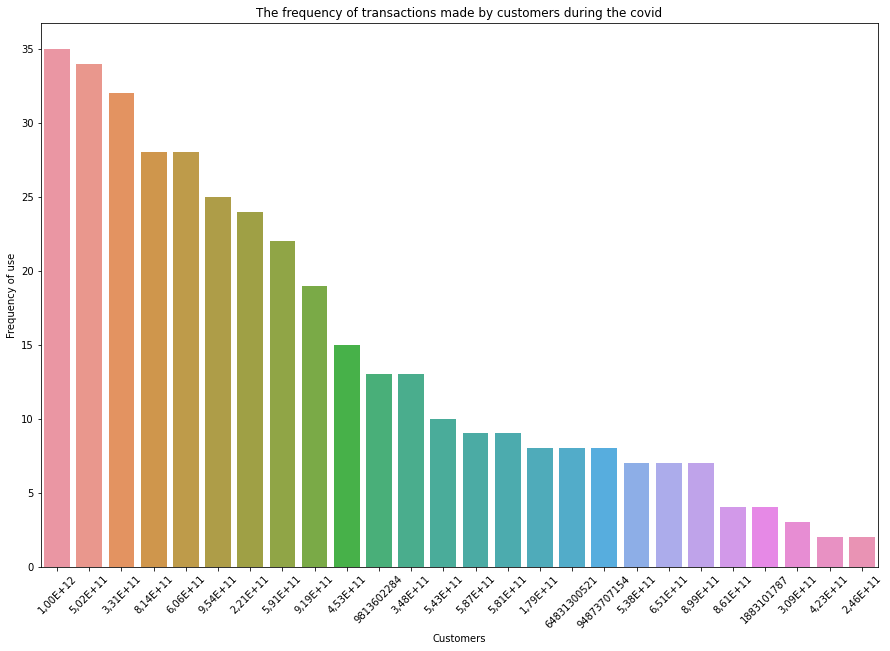

In [65]:
plt.figure(figsize=(15,10))
sns.barplot(x=covid_freq.index,y=covid_freq['frequency'])
plt.xlabel('Customers')
plt.ylabel('Frequency of use')
plt.title("The frequency of transactions made by customers during the covid")
plt.xticks(rotation= 45);

In [70]:
# The frequency of using credit card for each customer during covid
covid_freq

,frequency
id,
"1,00E+12",35
"5,02E+11",34
"3,31E+11",32
"8,14E+11",28
"6,06E+11",28
"9,54E+11",25
"2,21E+11",24
"5,91E+11",22
"9,19E+11",19


In [67]:
covid['category_expense'].value_counts()

SERVIO           97
VAREJO            73
RESTAURANTE       61
SUPERMERCADOS     39
FARMACIAS         27
M.O.T.O.          24
POSTO DE GAS      19
ARTIGOS ELETRO    13
LOJA DE DEPART     9
VESTUARIO          5
SEM RAMO           2
AUTO PEAS         2
MAT CONSTRUCAO     2
MOVEIS E DECOR     2
HOSP E CLINICA     1
Name: category_expense, dtype: int64

In [71]:
# Since there is no specific rule, I create the essential and non-essential list myself.

essential_list = ['FARMACIAS','VAREJO','HOSP E CLINICA','SUPERMERCADOS','POSTO DE GAS','TRANS FINANC']

non_essential_list = ['SERVI\x82O','M.O.T.O.','ARTIGOS ELETRO','LOJA DE DEPART','VESTUARIO','SEM RAMO','MAT CONSTRUCAO','RESTAURANTE','CIA AEREAS','MOVEIS E DECOR','JOALHERIA','AGENCIA DE TUR','HOTEIS','AUTO PE AS','INEXISTENTE','']

In [72]:
# The transaction amount from the essential list during the COVID

covid[covid.category_expense.isin(essential_list)]['category_expense'].value_counts()

VAREJO            73
SUPERMERCADOS     39
FARMACIAS         27
POSTO DE GAS      19
HOSP E CLINICA     1
Name: category_expense, dtype: int64

In [73]:
# The transaction amount from the non-essential list during the COVID

covid[covid.category_expense.isin(non_essential_list)]['category_expense'].value_counts()

SERVIO           97
RESTAURANTE       61
M.O.T.O.          24
ARTIGOS ELETRO    13
LOJA DE DEPART     9
VESTUARIO          5
SEM RAMO           2
MAT CONSTRUCAO     2
MOVEIS E DECOR     2
Name: category_expense, dtype: int64

% of essential vs % non-essential expenses. and in Brazilian R$


In [74]:
# % of essential
print('Total spending during corid: ',covid['amount'].sum(),'Brazillian R')
print('Total spending in essential category during covid',covid[covid.category_expense.isin(essential_list)]['amount'].sum(),'Brazillian R')
print('Essential : %',covid[covid.category_expense.isin(essential_list)]['amount'].sum() * 100 / covid['amount'].sum())
essential_covid = covid[covid.category_expense.isin(essential_list)]['amount'].sum() * 100 / covid['amount'].sum()

Total spending during corid:  44802.19 Brazillian R
Total spending in essential category during covid 20816.75 Brazillian R
Essential : % 46.463688493799076


In [75]:
# % of non essential
print('Total spending during covid: ',covid['amount'].sum(),'Brazillian R')
print('Total spending in non essential category during covid',covid[covid.category_expense.isin(non_essential_list)]['amount'].sum(),'Brazillian R')
print('Non - Essential : %',covid[covid.category_expense.isin(non_essential_list)]['amount'].sum() * 100 / covid['amount'].sum())
non_essential_covid = covid[covid.category_expense.isin(non_essential_list)]['amount'].sum() * 100 / covid['amount'].sum()

Total spending during covid:  44802.19 Brazillian R
Total spending in non essential category during covid 23524.269999999997 Brazillian R
Non - Essential : % 52.5069645032977


In [25]:
# Top 3 essential expenses

In [76]:
covid[covid.category_expense.isin(essential_list)]['category_expense'].value_counts()[:3]

VAREJO           73
SUPERMERCADOS    39
FARMACIAS        27
Name: category_expense, dtype: int64

In [27]:
# Top 3 non - essential expenses

In [77]:
covid[covid.category_expense.isin(non_essential_list)]['category_expense'].value_counts()[:3]

SERVIO        97
RESTAURANTE    61
M.O.T.O.       24
Name: category_expense, dtype: int64

In [96]:
pre_covid.head()

,id,branch_number,city,state,age,total_credit_card_limit,current_available_limit,date,amount,category_expense,purchase_city,purchase_country,Female
8,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,5943,2020-01-06,10.00,ARTIGOS ELETRO,SAO PAULO,BR,1
13,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,6326,2020-02-07,10.00,ARTIGOS ELETRO,SAO PAULO,BR,1
26,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,5851,2020-02-22,5.00,M.O.T.O.,Eden Prarie,BR,1
27,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,5849,2020-02-23,2.00,M.O.T.O.,Eden Prarie,BR,1
34,"4,53E+11",201405,CAMPO LIMPO PAULISTA,SP,37,4700,5189,2020-03-13,5.68,SERVIO,SAO PAULO,BR,1


In [91]:
# Frequency of use

pre_covid_freq = pre_covid.groupby('id')[['age']].count().sort_values('age',ascending=False)
pre_covid_freq.columns = ['frequency']
print('average number of transactions frequency: ',pre_covid_freq.frequency.mean())
print('max number of transactions frequency: ',pre_covid_freq.frequency.max())
print('min number of transactions frequency: ',pre_covid_freq.frequency.min())

average number of transactions frequency:  39.65384615384615
max number of transactions frequency:  133
min number of transactions frequency:  5


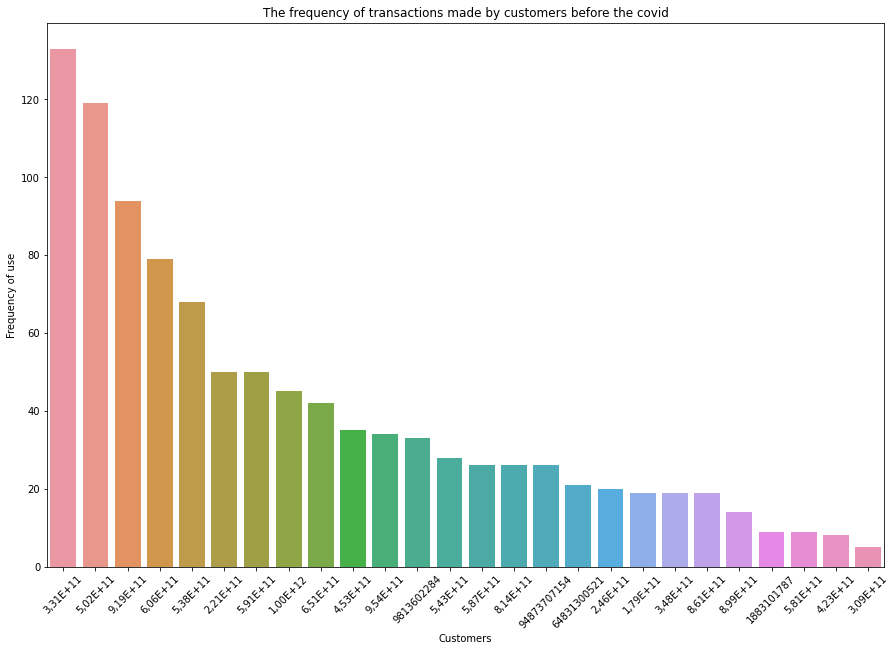

In [92]:
plt.figure(figsize=(15,10))
sns.barplot(x=pre_covid_freq.index,y=pre_covid_freq['frequency'])
plt.xlabel('Customers')
plt.ylabel('Frequency of use')
plt.title("The frequency of transactions made by customers before the covid")
plt.xticks(rotation= 45);

In [93]:
# The frequency of using credit card for each customer before covid
pre_covid_freq

,frequency
id,
"3,31E+11",133
"5,02E+11",119
"9,19E+11",94
"6,06E+11",79
"5,38E+11",68
"2,21E+11",50
"5,91E+11",50
"1,00E+12",45
"6,51E+11",42


In [97]:
# Since there is no specific rule, I create the essential and non-essential list myself.

essential_list = ['FARMACIAS','VAREJO','HOSP E CLINICA','SUPERMERCADOS','POSTO DE GAS','TRANS FINANC']

non_essential_list = ['SERVI\x82O','M.O.T.O.','ARTIGOS ELETRO','LOJA DE DEPART','VESTUARIO','SEM RAMO','MAT CONSTRUCAO','RESTAURANTE','CIA AEREAS','MOVEIS E DECOR','JOALHERIA','AGENCIA DE TUR','HOTEIS','AUTO PE AS','INEXISTENTE','']

In [98]:
# The transaction amount from the essential list before the COVID

pre_covid[pre_covid.category_expense.isin(essential_list)]['category_expense'].value_counts()

VAREJO            134
SUPERMERCADOS      99
FARMACIAS          44
POSTO DE GAS       38
HOSP E CLINICA      3
Name: category_expense, dtype: int64

In [99]:
# The transaction amount from the non-essential list before the COVID 

pre_covid[pre_covid.category_expense.isin(non_essential_list)]['category_expense'].value_counts()

SERVIO           356
RESTAURANTE       170
VESTUARIO          52
M.O.T.O.           43
ARTIGOS ELETRO     31
LOJA DE DEPART     16
CIA AEREAS         14
AGENCIA DE TUR      7
SEM RAMO            5
HOTEIS              5
MOVEIS E DECOR      4
INEXISTENTE         4
MAT CONSTRUCAO      3
JOALHERIA           1
Name: category_expense, dtype: int64

% of essential vs % non-essential expenses. and in Brazilian R$


In [100]:
# % of essential
print('Total spending before covid: ',pre_covid['amount'].sum(),'Brazillian R')
print('Total spending in essential category before covid',pre_covid[pre_covid.category_expense.isin(essential_list)]['amount'].sum(),'Brazillian R')
print('Essential : %',pre_covid[pre_covid.category_expense.isin(essential_list)]['amount'].sum() * 100 / pre_covid['amount'].sum())
essential_pre_covid = pre_covid[pre_covid.category_expense.isin(essential_list)]['amount'].sum() * 100 / pre_covid['amount'].sum()

Total spending before covid:  181488.82 Brazillian R
Total spending in essential category before covid 39345.7 Brazillian R
Essential : % 21.67940702903903


In [101]:
# % of non essential
print('Total spending before corid: ',pre_covid['amount'].sum(),'Brazillian R')
print('Total spending in non essential category before covid',pre_covid[pre_covid.category_expense.isin(non_essential_list)]['amount'].sum(),'Brazillian R')
print('Non - Essential : %',pre_covid[pre_covid.category_expense.isin(non_essential_list)]['amount'].sum() * 100 / pre_covid['amount'].sum())
non_essential_pre_covid = pre_covid[pre_covid.category_expense.isin(non_essential_list)]['amount'].sum() * 100 / pre_covid['amount'].sum()

Total spending before corid:  181488.82 Brazillian R
Total spending in non essential category before covid 141503.12 Brazillian R
Non - Essential : % 77.96795416929814


In [41]:
# Top 3 essential expenses

In [102]:
pre_covid[pre_covid.category_expense.isin(essential_list)]['category_expense'].value_counts()[:3]

VAREJO           134
SUPERMERCADOS     99
FARMACIAS         44
Name: category_expense, dtype: int64

In [43]:
# Top 3 non - essential expenses

In [103]:
pre_covid[pre_covid.category_expense.isin(non_essential_list)]['category_expense'].value_counts()[:3]

SERVIO        356
RESTAURANTE    170
VESTUARIO       52
Name: category_expense, dtype: int64

<font color='blue'>

According to these expenses, the values of the 10th customer are high

In [106]:
freq = pd.concat([covid_freq.sort_index(),pre_covid_freq.sort_index()],axis=1)
freq.columns = ['covid_freq','pre_covid_freq']

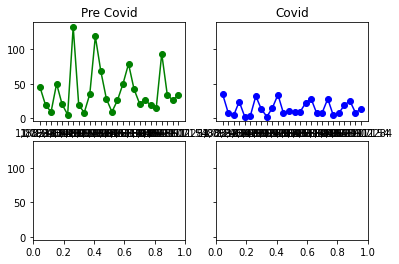

In [107]:
# The frequency of using credit card for each customer before covid vs during covid


fig, ax = plt.subplots(2,2,sharey=True)


ax[0,0].plot(pre_covid_freq.sort_index().index,pre_covid_freq.sort_index().values,color='g',marker='o')
ax[0,0].set_title('Pre Covid')


ax[0,1].plot(covid_freq.sort_index().index,covid_freq.sort_index().values,color='b',marker='o')
ax[0,1].set_title('Covid')

plt.show();

In [108]:
# The frequency of using credit card for each customer before covid vs during covid

import plotly.graph_objs as go
#import chart_studio.plotly as py


fig = go.Figure()
fig.add_trace(go.Box(y=freq.covid_freq, name='The frequency of using credit card for each customer during covid',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=freq.pre_covid_freq, name = 'The frequency of using credit card for each customer before covid',
                marker_color = 'lightseagreen'))

fig.show()

In [110]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go


# Creating trace1
trace1 = go.Scatter(
                    x = freq.index,
                    y = freq.covid_freq,
                    mode = "lines",
                    name = "Covid Freq",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= freq.covid_freq)
# Creating trace2
trace2 = go.Scatter(
                    x = freq.index,
                    y = freq.pre_covid_freq,
                    mode = "lines+markers",
                    name = "Pre Covidreq",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= freq.pre_covid_freq)
data = [trace1, trace2]
layout = dict(title = 'The frequency of using credit card for each customer before covid vs during covid',
              xaxis= dict(title= 'Customers',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

<font color='green'>


In [111]:
df.corr()

,branch_number,age,total_credit_card_limit,current_available_limit,amount,Female
branch_number,1.000000,-0.365763,-0.194742,-0.335052,-0.005254,0.109896
age,-0.365763,1.000000,0.554631,0.519919,0.111993,-0.094320
total_credit_card_limit,-0.194742,0.554631,1.000000,0.938872,0.186453,-0.428910
current_available_limit,-0.335052,0.519919,0.938872,1.000000,0.114712,-0.407079
amount,-0.005254,0.111993,0.186453,0.114712,1.000000,-0.058389
Female,0.109896,-0.094320,-0.428910,-0.407079,-0.058389,1.000000


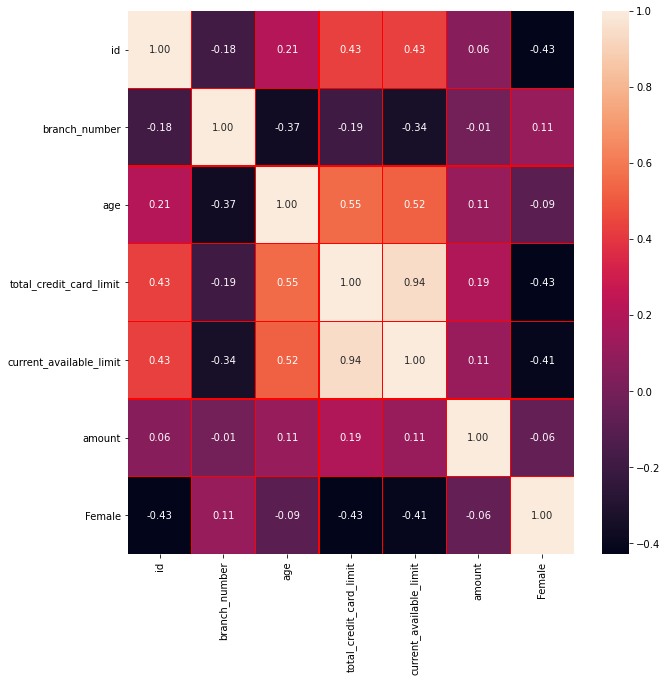

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.1,linecolor="red", fmt= '.2f',ax=ax);

In [ ]:
# age, cuurent variable limit and total credit limit has a stong correlation 
# higher total  expense in services, restaurants, varejo and supermarket (essential services)
#I look at the number of transactions each client has with a credit card by age 
#higer number of transactions  in the ages 34, 28, 27,32 (young people)